In [2]:
import numpy as np
from numpy import ma
import math
import scipy
import scipy.constants as constants
import os
from IPython.display import Image

from netCDF4 import Dataset
      
from cartopy import config
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.cm import get_cmap
from matplotlib import ticker

# from tqdm.notebook import tqdm,trange
# from matplotlib.mlab import bivariate_normal

NA = 6.022e+23

In [3]:

# 2*2.5
FILEDIR3 = '/n/home12/hongwei/HONGWEI/GC_run_13.0/1_plume_in_60deg/gc_2x25_eulerian'
NcFile3   = Dataset(FILEDIR3+'/OutputDir/GEOSChem.SpeciesConc.201501_02.nc4','r',format='NETCDF4_CLASSIC')

lat3             = NcFile3.variables['lat'][:]
lon3             = NcFile3.variables['lon'][:]
EU3              = NcFile3.variables['SpeciesConc_PASV_EU']

GC_AREA3 = NcFile3.variables['AREA'][:,:];


# lagrange: 2*2.5
FILEDIR0 = '/n/home12/hongwei/HONGWEI/GC_run_13.0/1_plume_in_60deg/gc_2x25_lagrange'
NcFile0   = Dataset(FILEDIR0+'/OutputDir/GEOSChem.SpeciesConc.201501_02.nc4','r',format='NETCDF4_CLASSIC')

lat0             = NcFile0.variables['lat'][:]
lon0             = NcFile0.variables['lon'][:]
LA0              = NcFile0.variables['SpeciesConc_PASV_LA'][:,:,:,:]
LA0_3            = NcFile0.variables['SpeciesConc_PASV_LA3'][:,:,:,:]

LA0 = LA0 + LA0_3

GC_AREA0 = NcFile0.variables['AREA'][:,:];

EU3

<class 'netCDF4._netCDF4.Variable'>
float32 SpeciesConc_PASV_EU(time, lev, lat, lon)
    long_name: Dry mixing ratio of species PASV_EU
    units: mol mol-1 dry
    averaging_method: instantaneous
unlimited dimensions: time
current shape = (59, 72, 91, 144)
filling off

In [4]:
del NcFile0, NcFile3

In [5]:
#------------------------------------------------
# total air mass in each grid  ------------------
#------------------------------------------------
            

# 2x2.5         
AD_file3 = open(FILEDIR3+'/State_Met_AD.txt','r')

GC_AD3 = EU3[0,:,:,:]*0.0

Nx3 = len(EU3[0,0,0,:])
Ny3 = len(EU3[0,0,:,0])
Nz3 = len(EU3[0,:,0,0])
Nt3 = len(EU3[:,0,0,0])

for ix in range(Nx3):
    for iy in range(Ny3):
        for iz in range(Nz3):
            line = AD_file3.readline()
            GC_AD3[iz,iy,ix] = float(line)
            

# Lagrange: 2x2.5          
AD_file0 = open(FILEDIR0+'/State_Met_AD.txt','r')

GC_AD0 = LA0[0,:,:,:]*0.0

Nx0 = len(LA0[0,0,0,:])
Ny0 = len(LA0[0,0,:,0])
Nz0 = len(LA0[0,:,0,0])
Nt0 = len(LA0[:,0,0,0])

for ix in range(Nx0):
    for iy in range(Ny0):
        for iz in range(Nz0):
            line = AD_file0.readline()
            GC_AD0[iz,iy,ix] = float(line)

In [6]:
del AD_file0, AD_file3


In [7]:
# # 3-D entropy

# k = constants.k
# print(f'Boltzmann constant={k}')

# # change total air mass from kg to mol

# AD1_mol = GC_AD1[:,:,:]*1000.0/28.97
# AD2_mol = GC_AD2[:,:,:]*1000.0/28.97

# # entropy

# Entropy3d_EU1, Entropy3d_LA1, Entropy3d_EU2, Entropy3d_LA2 = [], [], [], []

# for it in range(Nt1):
#     S_EU1 = -k*np.sum( GC_AD1[:,:,:]*EU1[it,:,:,:]* np.log(EU1[it,:,:,:], out=np.zeros_like(EU1[it,:,:,:]), \
#                                                            where=(EU1[it,:,:,:]!=0)), axis=(0,1,2) )
#     S_LA1 = -k*np.sum( GC_AD1[:,:,:]*LA1[it,:,:,:]* np.log(LA1[it,:,:,:], out=np.zeros_like(LA1[it,:,:,:]), \
#                                                            where=(LA1[it,:,:,:]!=0)), axis=(0,1,2) )

#     S_EU2 = -k*np.sum( GC_AD2[:,:,:]*EU2[it,:,:,:]* np.log(EU2[it,:,:,:], out=np.zeros_like(EU2[it,:,:,:]), \
#                                                            where=(EU2[it,:,:,:]!=0)), axis=(0,1,2) )
#     S_LA2 = -k*np.sum( GC_AD2[:,:,:]*LA2[it,:,:,:]* np.log(LA2[it,:,:,:], out=np.zeros_like(LA2[it,:,:,:]), \
#                                                            where=(LA2[it,:,:,:]!=0)), axis=(0,1,2) )
    
#     Entropy3d_EU1.append(S_EU1)
#     Entropy3d_LA1.append(S_LA1)
#     Entropy3d_EU2.append(S_EU2)    
#     Entropy3d_LA2.append(S_LA2)
    
# # print(Entropy3d_EU1, Entropy3d_LA1)
# # print(Entropy3d_EU2, Entropy3d_LA2)



In [8]:
# # Plot CFD curve: mass vs. area
# plt.figure(figsize=(10,7), dpi= 80)

# plt.plot(Entropy3d_LA1,'b',label=f'Lagrange 2*2.5')
# plt.plot(Entropy3d_LA2,'b--',label=f'Lagrange 4*5')

# plt.plot(Entropy3d_EU1,'r',label=f'Euler 2*2.5')
# plt.plot(Entropy3d_EU2,'r--',label=f'Euler 4*5')


# #plt.legend(loc='upper left')
# plt.title(' Entropy3d')
# plt.xlabel(' day ')
# plt.ylabel(' Entropy ')
# plt.legend()

# plt.savefig('Entropy_time_series.png')
# plt.clf();
# plt.cla();
# plt.close();

# Image('Entropy_time_series.png') 

In [9]:
# # 2-D entropy corresponding to the below contour figure

# k = constants.k
# print(f'Boltzmann constant={k}')

# # change total air mass from kg to mol:
# AD1_mol = GC_AD1[:,:,:]*1000.0/28.97
# AD2_mol = GC_AD2[:,:,:]*1000.0/28.97


# Entropy2d_EU1, Entropy2d_LA1, Entropy2d_EU2, Entropy2d_LA2 = [], [], [], []


# AD1_mol_Zsum = np.sum(AD1_mol, axis=0)
# AD2_mol_Zsum = np.sum(AD2_mol, axis=0)

# for it in range(Nt1):
#     # change 3D mixing ratio to 2D:
#     EU1_mol_Zsum = np.sum( EU1[it,:,:,:]*AD1_mol[:,:,:], axis=0)
#     LA1_mol_Zsum = np.sum( LA1[it,:,:,:]*AD1_mol[:,:,:], axis=0)

#     EU2_mol_Zsum = np.sum( EU2[it,:,:,:]*AD2_mol[:,:,:], axis=0)
#     LA2_mol_Zsum = np.sum( LA2[it,:,:,:]*AD2_mol[:,:,:], axis=0)

#     # calculate 2D mixing ratio:
#     EU1_MR = EU1_mol_Zsum/AD1_mol_Zsum
#     LA1_MR = LA1_mol_Zsum/AD1_mol_Zsum

#     EU2_MR = EU2_mol_Zsum/AD2_mol_Zsum
#     LA2_MR = LA2_mol_Zsum/AD2_mol_Zsum

#     # entropy
#     S2_EU1 = -k*np.sum( AD1_mol_Zsum[:,:]*EU1_MR[:,:]* np.log(EU1_MR[:,:], out=np.zeros_like(EU1_MR[:,:]), \
#                                                               where=(EU1_MR[:,:]!=0)), axis=(0,1) )
#     S2_LA1 = -k*np.sum( AD1_mol_Zsum[:,:]*LA1_MR[:,:]* np.log(LA1_MR[:,:], out=np.zeros_like(LA1_MR[:,:]), \
#                                                               where=(LA1_MR[:,:]!=0)), axis=(0,1) )

#     S2_EU2 = -k*np.sum( AD2_mol_Zsum[:,:]*EU2_MR[:,:]* np.log(EU2_MR[:,:], out=np.zeros_like(EU2_MR[:,:]), \
#                                                           where=(EU2_MR[:,:]!=0)), axis=(0,1) )
#     S2_LA2 = -k*np.sum( AD2_mol_Zsum[:,:]*LA2_MR[:,:]* np.log(LA2_MR[:,:], out=np.zeros_like(LA2_MR[:,:]), \
#                                                           where=(LA2_MR[:,:]!=0)), axis=(0,1) )

#     Entropy2d_EU1.append(S2_EU1)
#     Entropy2d_LA1.append(S2_LA1)
#     Entropy2d_EU2.append(S2_EU2)    
#     Entropy2d_LA2.append(S2_LA2)

# # print(Entropy2d_EU1, Entropy2d_LA1)
# # print(Entropy2d_EU2, Entropy2d_LA2)


In [10]:
# # Plot CFD curve: mass vs. area
# plt.figure(figsize=(10,7), dpi= 80)

# plt.plot(Entropy2d_LA1,'b',label=f'Lagrange 2*2.5')
# plt.plot(Entropy2d_LA2,'b--',label=f'Lagrange 4*5')

# plt.plot(Entropy2d_EU1,'r',label=f'Euler 2*2.5')
# plt.plot(Entropy2d_EU2,'r--',label=f'Euler 4*5')


# #plt.legend(loc='upper left')
# plt.title(' Entropy2d')
# plt.xlabel(' day ')
# plt.ylabel(' Entropy ')
# plt.legend()

# plt.savefig('Entropy_time_series.png')
# plt.clf();
# plt.cla();
# plt.close();

# Image('Entropy_time_series.png') 

In [11]:
# for Gini and cumulative distribution function (CDF)

In [12]:
### change unit, do average 


# 2.0x2.5
EU3_molec = EU3[:,:,:,:]*0.0
for i in range(Nt3):
    EU3_molec[i,:,:,:] = EU3[i,:,:,:]*(GC_AD3[:,:,:]*1000.0/28.97)*NA # [mol/mol] to [molec]
    
EU3_Zsum = np.sum(EU3_molec[:,:,:,:], axis=1)
for i in range(Nt3):
    EU3_Zsum[i,:,:] = EU3_Zsum[i,:,:]/GC_AREA3[:,:]/1e4 # [molec/cm2]
     
print( np.sum(EU3_molec[Nt3-1,:,:,:]) )

# lagrange: 2.0x2.5
LA0_molec = LA0[:,:,:,:]*0.0
for i in range(Nt0):
    LA0_molec[i,:,:,:] = LA0[i,:,:,:]*(GC_AD0[:,:,:]*1000.0/28.97)*NA

LA0_Zsum = np.sum(LA0_molec[:,:,:,:], axis=1)
for i in range(Nt0):
    LA0_Zsum[i,:,:]   = LA0_Zsum[i,:,:]/GC_AREA0[:,:]/1e4
    
print( np.sum(LA0_molec[Nt0-1,:,:,:]) )


1.11914676e+30
1.1080417e+30


In [13]:
# delete original variable to save memory
del EU3, LA0

In [14]:


EU3_area_cumsum_frac_time = []
EU3_mass_cumsum_frac_time = []

LA0_area_cumsum_frac_time = []
LA0_mass_cumsum_frac_time = []


for it in range(Nt0):
    # concentration
    EU3_Zsum_1D = EU3_Zsum[it,:,:].reshape(Nx3*Ny3)
    LA0_Zsum_1D = LA0_Zsum[it,:,:].reshape(Nx0*Ny0)

    # grid cell area
    GC_AREA3_1D = GC_AREA3.reshape(Nx3*Ny3)
    GC_AREA0_1D = GC_AREA0.reshape(Nx0*Ny0)

    # grid cell mass for injected tracer
    EU3_molec_Zsum = np.sum(EU3_molec[it,:,:,:], axis=0)
    LA0_molec_Zsum = np.sum(LA0_molec[it,:,:,:], axis=0)
    
    EU3_molec_Zsum_1D = EU3_molec_Zsum.reshape(Nx3*Ny3)
    LA0_molec_Zsum_1D = LA0_molec_Zsum.reshape(Nx0*Ny0)


    # get index for sorted concentration

    EU3_index = EU3_Zsum_1D.argsort()
    EU3_area_sorted = GC_AREA3_1D[EU3_index]
    EU3_mass_sorted = EU3_molec_Zsum_1D[EU3_index]
    
    LA0_index = LA0_Zsum_1D.argsort()
    LA0_area_sorted = GC_AREA0_1D[LA0_index]
    LA0_mass_sorted = LA0_molec_Zsum_1D[LA0_index]

    
    # cumulative sum

    EU3_area_cumsum = np.cumsum(EU3_area_sorted)
    EU3_mass_cumsum = np.cumsum(EU3_mass_sorted)
    
    LA0_area_cumsum = np.cumsum(LA0_area_sorted)
    LA0_mass_cumsum = np.cumsum(LA0_mass_sorted)

    # calculate fraction

    length3 = len(EU3_area_cumsum)
    EU3_area_cumsum_frac = EU3_area_cumsum/EU3_area_cumsum[length3-1]
    EU3_mass_cumsum_frac = EU3_mass_cumsum/EU3_mass_cumsum[length3-1]
    
    length0 = len(LA0_area_cumsum)
    LA0_area_cumsum_frac = LA0_area_cumsum/LA0_area_cumsum[length0-1]
    LA0_mass_cumsum_frac = LA0_mass_cumsum/LA0_mass_cumsum[length0-1]

    
    EU3_area_cumsum_frac_time.append(EU3_area_cumsum_frac)
    EU3_mass_cumsum_frac_time.append(EU3_mass_cumsum_frac)

    LA0_area_cumsum_frac_time.append(LA0_area_cumsum_frac)
    LA0_mass_cumsum_frac_time.append(LA0_mass_cumsum_frac)

In [15]:
del EU3_molec, LA0_molec
del EU3_molec_Zsum, LA0_molec_Zsum

print(EU3_area_cumsum_frac)
print(EU3_mass_cumsum_frac)


[2.51989986281842e-05 5.03979972563684e-05 7.971905142767355e-05 ...
 0.999825656414032 0.9999128580093384 1.0]
[7.192937232503027e-07 1.4397758150153095e-06 2.283447884110501e-06 ...
 0.9996468424797058 0.9998224973678589 1.0]


In [16]:
len(EU3_area_cumsum_frac),len(LA0_area_cumsum_frac)

(13104, 13104)

In [17]:
# calculate Gini coefficient

Gini_Eu3_time, Gini_La0_time = [], []

for it in range(Nt0):
    diag = np.linspace(0,1,100)
    Al = np.trapz(diag, diag)

    EU3 = np.trapz(EU3_mass_cumsum_frac_time[it], EU3_area_cumsum_frac_time[it])
    LA0 = np.trapz(LA0_mass_cumsum_frac_time[it], LA0_area_cumsum_frac_time[it])
    
    Gini_Eu3 = (Al-EU3)/Al
    Gini_La0 = (Al-LA0)/Al
    
#     print(Gini_Eu3,Gini_La0)
    
    Gini_Eu3_time.append(Gini_Eu3)
    Gini_La0_time.append(Gini_La0)
    
print(Al)
print('Gini_La_Eu')
print(Gini_La0)
print(Gini_Eu3)


0.5
Gini_La_Eu
0.3199641704559326
0.2709920406341553


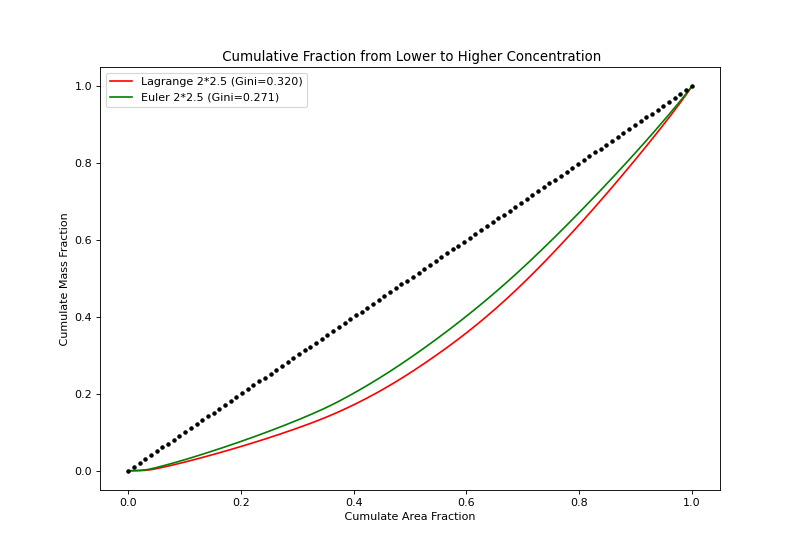

In [18]:
# Plot CFD curve: mass vs. area in the END of the simulation
plt.figure(figsize=(10,7), dpi= 80)

plt.plot(LA0_area_cumsum_frac_time[Nt0-1],LA0_mass_cumsum_frac_time[-1],'r',label=f'Lagrange 2*2.5 (Gini={Gini_La0:.3f})')

plt.plot(EU3_area_cumsum_frac_time[Nt0-1],EU3_mass_cumsum_frac_time[-1],'g',label=f'Euler 2*2.5 (Gini={Gini_Eu3:.3f})')



diag = np.linspace(0,1,100)
plt.plot(diag,diag,'k.')


#plt.legend(loc='upper left')
plt.title(' Cumulative Fraction from Lower to Higher Concentration')
plt.xlabel(' Cumulate Area Fraction ')
plt.ylabel(' Cumulate Mass Fraction ')
plt.legend()

plt.savefig('CDF_Area_Mass.png')
plt.clf();
plt.cla();
plt.close();

Image('CDF_Area_Mass.png') 

In [19]:
# Plot Gini coefficient at different time:

plt.figure(figsize=(12,6), dpi= 100)

plt.plot(Gini_La0_time[0:365],'r',label=f'Lagrange 2*2.5 (Gini={Gini_La0:.3f})')
plt.plot(Gini_Eu3_time[0:365],'b--',label=f'Euler 2x2.5 (Gini={Gini_Eu3:.3f})')

# add line for 1day, 1mon, 1year
# a = 0.5*(Gini_La0_time[1]+Gini_Eu3_time[1])
# plt.plot([1, 1], [a, a], 'kX', label='1 day')

# a = 0.5*(Gini_La0_time[30]+Gini_Eu3_time[30])
# plt.plot([30, 30], [a, a], 'kX', label='1 mon')

# a = 0.5*(Gini_La0_time[365]+Gini_Eu3_time[365])
# plt.plot([365, 365], [a, a], 'kX', label='1 year')

#plt.legend(loc='upper left')
plt.title(' Gini Coefficient at different time')
plt.xlabel(' Day ')
plt.ylabel(' Gini Coefficient ')
plt.legend()

plt.savefig('Gini_time_series.png')
plt.clf();
plt.cla();
plt.close();


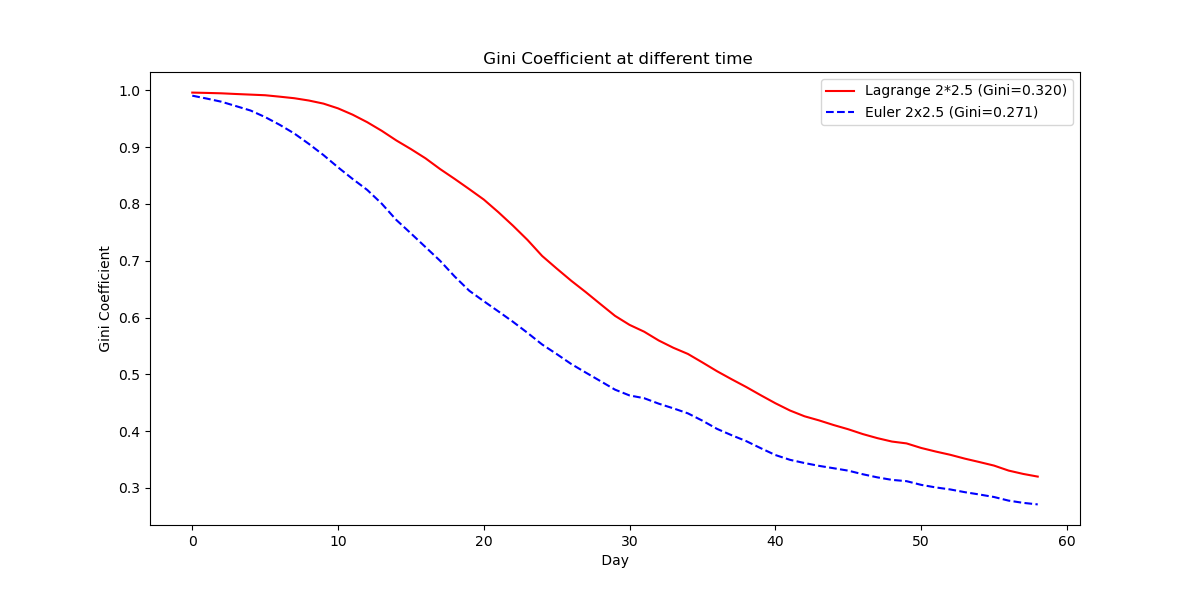

In [20]:
Image('Gini_time_series.png') 

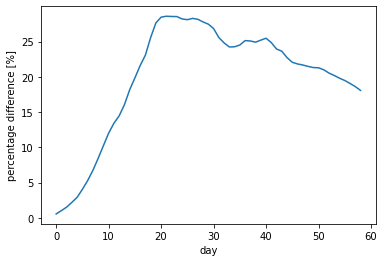

In [25]:
plt.plot( 100*(np.array(Gini_La0_time)-Gini_Eu3_time)/Gini_Eu3_time );
plt.ylabel('percentage difference [%]');
plt.xlabel('day');

In [18]:
CPU_La0 = 11*24+12

CPU_Eu1 = 26*24+2
CPU_Eu2 = 6*24+18
CPU_Eu3 = 18
CPU_Eu4 = 5

CPU_Eus = [CPU_Eu1, CPU_Eu2,CPU_Eu3,CPU_Eu4]
Gini_Eus = [Gini_Eu1, Gini_Eu2,Gini_Eu3,Gini_Eu4]

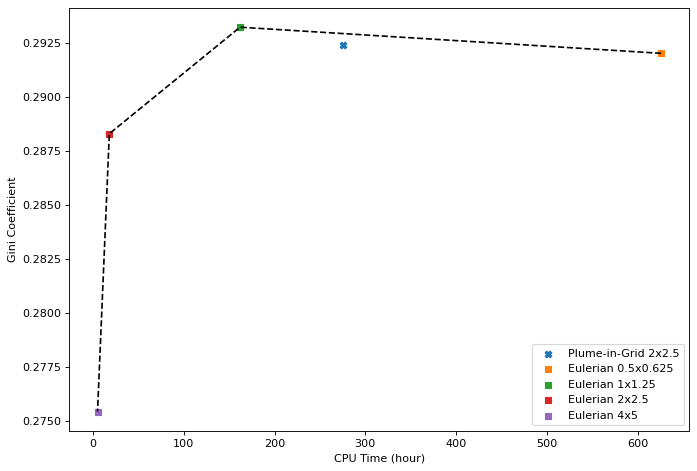

In [19]:

plt.figure(figsize=(10,7), dpi= 80)

plt.plot(CPU_Eus, Gini_Eus, 'k--')

plt.scatter(CPU_La0,Gini_La0,  marker='X', label='Plume-in-Grid 2x2.5')
plt.scatter(CPU_Eu1, Gini_Eu1, marker='s', label='Eulerian 0.5x0.625')
plt.scatter(CPU_Eu2, Gini_Eu2, marker='s', label='Eulerian 1x1.25')
plt.scatter(CPU_Eu3, Gini_Eu3, marker='s', label='Eulerian 2x2.5')
plt.scatter(CPU_Eu4, Gini_Eu4, marker='s', label='Eulerian 4x5')

# plt.plot([CPU_Eu1, CPU_Eu1],[0.6,0.7],'y',label='Eulerian 0.5x0.625')

plt.xlabel('CPU Time (hour)')
plt.ylabel('Gini Coefficient')
plt.legend()